<a href="https://colab.research.google.com/github/Leandro-Bernardo/dio-twitter-py/blob/master/Script_questao4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# codigos  que serviram como material de apoio para produzir o presente script: 

#https://mattmaulion.medium.com/white-balancing-an-enhancement-technique-in-image-processing-8dd773c69f6#:~:text=The%20gray%2Dworld%20algorithm%20is,the%20color%20of%20the%20light.
#https://jmanansala.medium.com/image-processing-with-python-color-correction-using-white-balancing-6c6c749886de

# Referencias: https://cielab.xyz/pdf/cie.15.2004%20colorimetry.pdf

### White Balance no RGB

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
Image.MAX_IMAGE_PIXELS = None # desativa o numero máximo de pixels da imagem (89 mp por default) https://stackoverflow.com/questions/25705773/image-cropping-tool-python

In [ ]:
im = plt.imread('im2.jpg')   

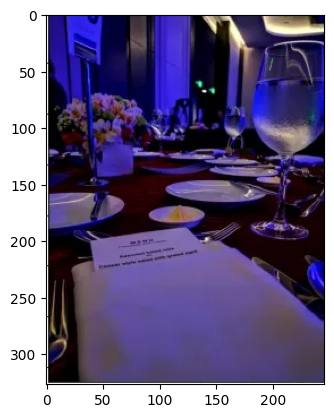

In [ ]:
plt.imshow(im)
plt.axis('off')

In [ ]:
r, g, b = cv2.split(im)    # separa os canais das imagens (matplotlib segue a ordem RGB, opencv segue a ordem BGR)

# https://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_matplotlib_rgb_brg_image_load_display_save.php#:~:text=OpenCV%20follows%20BGR%20order%2C%20while%20matplotlib%20likely%20follows%20RGB%20order.

In [ ]:
#r,g,b = im[:,:,0], im[:,:,1], im[:,:,2]

(Text(0.5, 1.0, 'original'),
 Text(0.5, 1.0, 'r'),
 Text(0.5, 1.0, 'g'),
 Text(0.5, 1.0, 'b'))

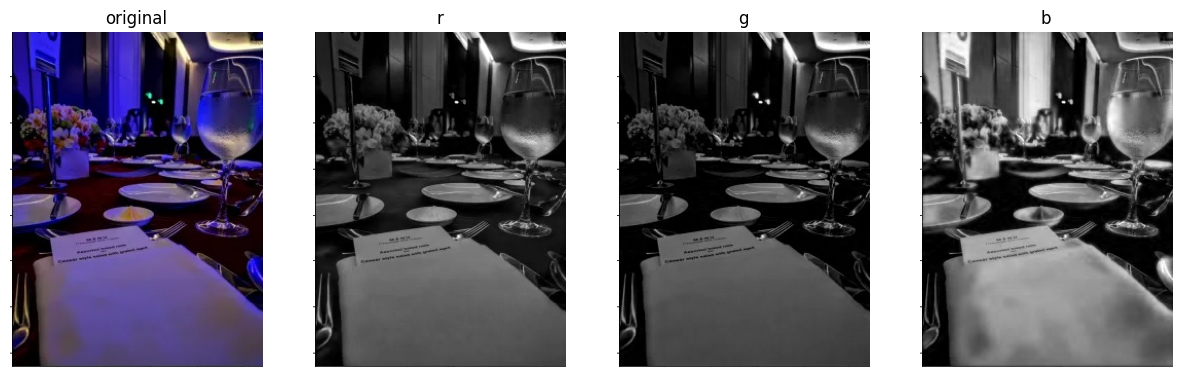

In [ ]:
f, coords = plt.subplots(1,4, figsize = (15,15))

coords[0].imshow(im),  coords[1].imshow(r, cmap = 'gray'),  coords[2].imshow(g, cmap = 'gray'),  coords[3].imshow(b, cmap = 'gray')
coords[0].axis('off'),  coords[1].axis('off'), coords[2].axis('off'), coords[3].axis('off')
coords[0].set_title('original'),  coords[1].set_title('r'),  coords[2].set_title('g'),  coords[3].set_title('b')

In [ ]:
branco_medio = (r.mean(), g.mean(), b.mean())
branco_medio

(64.09747395639094, 49.703140150667565, 97.46166181845305)

In [ ]:
branco_medio_d50 = (197, 197, 197)
branco_medio_d55 = (203, 203, 203)
branco_medio_d65 = (216, 216, 216)
branco_medio_d75 = (224, 224, 224)

In [ ]:
white_balance = str(input('Qual Iluminante?')).upper()

if white_balance == 'D50':
    white_balance = branco_medio_d50

elif white_balance == 'D55':
    white_balance = branco_medio_d55

elif white_balance == 'D65':
    white_balance = branco_medio_d65

elif white_balance == 'D75':
    white_balance = branco_medio_d75

else: print('Valor invalido de Iluminante')

print(white_balance)

(197, 197, 197)


In [ ]:
fator = np.array(white_balance) / np.array(branco_medio)
fator

array([3.07344405, 3.96353227, 2.02130762])

In [ ]:
novo_r = np.clip([x*fator[0] for x in r], 0, 255)
novo_g = np.clip([x*fator[1] for x in g], 0, 255)
novo_b = np.clip([x*fator[2] for x in b], 0, 255)

In [ ]:
im_2 = cv2.merge([novo_r,novo_g,novo_b])  # converte os canais (r, g e b) em uma unica imagem

im_2 = np.uint8(im_2)   # converte os niveis de intensidade para inteiros

im_2 = Image.fromarray(im_2)  # converte o array para um objeto de PIL.Image

In [ ]:
im_2.show()

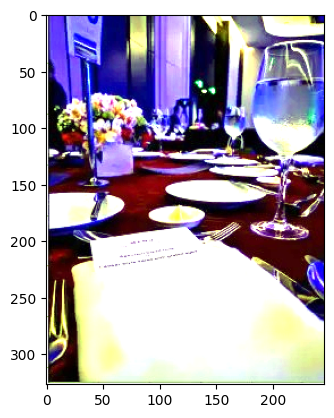

In [ ]:
#plt.imshow(im_2)

### White Balance no CIE XYZ

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
Image.MAX_IMAGE_PIXELS = None # desativa o numero máximo de pixels da imagem (89 mp por default) https://stackoverflow.com/questions/25705773/image-cropping-tool-python

In [ ]:
im = plt.imread('im2.jpg')   

(-0.5, 245.5, 326.5, -0.5)

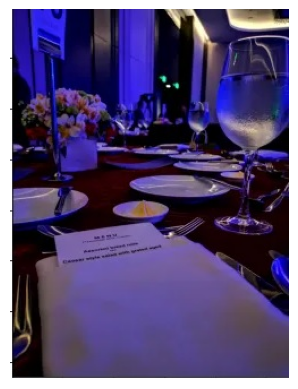

In [ ]:
plt.imshow(im)
plt.axis('off')

In [ ]:
r, g, b = cv2.split(im)    # separa os canais das imagens (matplotlib segue a ordem RGB, opencv segue a ordem BGR)

# https://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_matplotlib_rgb_brg_image_load_display_save.php#:~:text=OpenCV%20follows%20BGR%20order%2C%20while%20matplotlib%20likely%20follows%20RGB%20order.

In [ ]:
r, g, b  =  r/255, g/255, b/255  # normaliza os canais

(Text(0.5, 1.0, 'original'),
 Text(0.5, 1.0, 'r'),
 Text(0.5, 1.0, 'g'),
 Text(0.5, 1.0, 'b'))

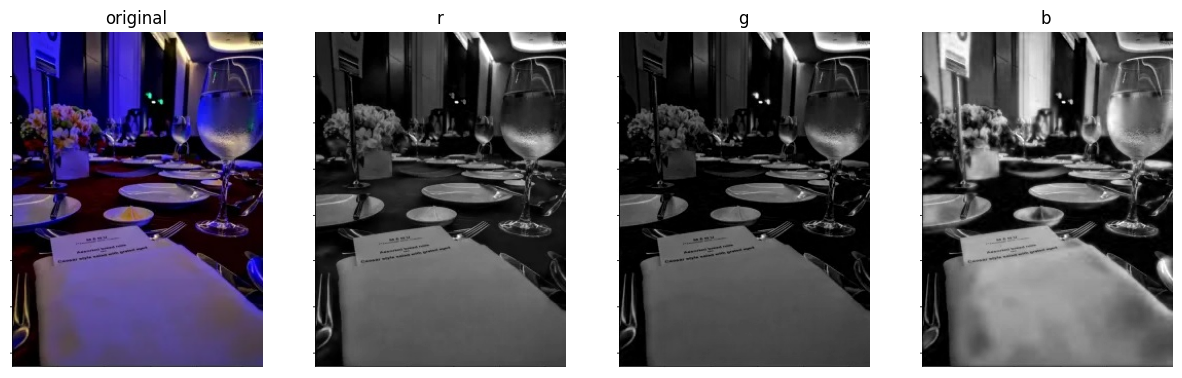

In [ ]:
f, coords = plt.subplots(1,4, figsize = (15,15))

coords[0].imshow(im),  coords[1].imshow(r, cmap = 'gray'),  coords[2].imshow(g, cmap = 'gray'),  coords[3].imshow(b, cmap = 'gray')
coords[0].axis('off'),  coords[1].axis('off'), coords[2].axis('off'), coords[3].axis('off')
coords[0].set_title('original'),  coords[1].set_title('r'),  coords[2].set_title('g'),  coords[3].set_title('b')

In [ ]:
matrix = [        # faz a transformação do espaço RGB pro espaço XYZ
    [0.4124564, 0.3575761, 0.1804375],
    [0.2126729, 0.7151522, 0.0721750],
    [0.0193339, 0.1191920, 0.9503041]
]

In [ ]:
# converte pro espaco xyz (multiplicação matricial)
    
x = np.array(matrix[0][0] * r + matrix[0][1] * g + matrix[0][2] * b)
y = np.array(matrix[1][0] * r + matrix[1][1] * g + matrix[1][2] * b)
z = np.array(matrix[2][0] * r + matrix[2][1] * g + matrix[2][2] * b)


In [ ]:
len(x[0])

246

In [ ]:
branco_medio = (x.mean()*255, y.mean()*255, z.mean()*255)
branco_medio

(61.795806974343, 56.21140113638523, 99.78168765145323)

In [ ]:
branco_medio_d50 = [0.96422, 1.00000, 0.82521]
branco_medio_d55 = [0.95682, 1.00000, 0.92149]
branco_medio_d65 = [0.95047, 1.00000, 1.08883]
branco_medio_d75 = [0.94972, 1.00000, 1.22638]

In [ ]:
# transformacao_d50 = [[0.96422, -0.00103, 0.01413], [-0.00239, 1.00000, -0.00091], [0.01026, -0.00317, 0.96416]]

# transformacao_d55 = [[0.95682, -0.00412, 0.02399], [-0.00195, 1.00000, -0.00292], [0.01501, -0.00829, 0.91417]]

# transformacao_d65 = [[0.41246, 0.35758, 0.18043], [0.21267, 0.71516, 0.07217], [0.01933, 0.11919, 0.95022]]

# transformacao_d75 = [[0.29968, 0.57917, 0.11415], [0.21223, 0.71540, 0.07236], [0.04735, 0.11837, 0.81328]]



In [ ]:
white_balance = str(input('Qual Iluminante?')).upper()

if white_balance == 'D50':
    white_balance = branco_medio_d50

elif white_balance == 'D55':
    white_balance = branco_medio_d55

elif white_balance == 'D65':
    white_balance = branco_medio_d65

elif white_balance == 'D75':
    white_balance = branco_medio_d75

else: print('Valor invalido de Iluminante')

print(white_balance)

[0.94972, 1.0, 1.22638]


In [ ]:
fator = np.array(white_balance) / np.array(branco_medio)*255  # fator de correção
fator

array([3.91901347, 4.53644625, 3.13411115])

In [ ]:
novo_r = np.clip([x*fator[0]*255 for x in r], 0, 255)
novo_g = np.clip([x*fator[1]*255 for x in g], 0, 255)
novo_b = np.clip([x*fator[2]*255 for x in b], 0, 255)

In [ ]:
im_2 = cv2.merge([novo_r,novo_g,novo_b])  # converte os canais (r, g e b) em uma unica imagem

im_2 = np.uint8(im_2)   # converte os niveis de intensidade para inteiros

im_2 = Image.fromarray(im_2)  # converte o array para um objeto de PIL.Image

In [ ]:
im_2.show()